In [ ]:
import numpy as np
import pandas as pd

# CSV 다운로드 및 샘플링
url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
df = pd.read_csv(url, compression='zip')[5::6]  # 10분→1시간 단위 변환
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

print(df.columns)
print(df.info())  

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70091 entries, 5 to 420545
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date Time        70091 non-null  datetime64[ns]
 1   p (mbar)         70091 non-null  float64       
 2   T (degC)         70091 non-null  float64       
 3   Tpot (K)         70091 non-null  float64       
 4   Tdew (degC)      70091 non-null  float64       
 5   rh (%)           70091 non-null  float64       
 6   VPmax (mbar)     70091 non-null  float64       
 7   VPact (mbar)     70091 non-null  float64       
 8   VPdef (mbar)     70091 non-null  float64       
 9   sh (g/kg)        70091 non-null  float64

In [2]:
# 데이터 전처리: 필요한 행, 열 선택 및 결측치 처리
df = df[(df['Date Time'] < '2013-03-01') & (df['Date Time'] > '2013-01-01')] # df를 2개월 치만 가져옴
numeric_df = df.select_dtypes(include=[np.number])

# 아웃라이어 제거
lower_bound = numeric_df.quantile(0.001)
upper_bound = numeric_df.quantile(0.999)
numeric_df = numeric_df[(numeric_df >= lower_bound) & (numeric_df <= upper_bound)].dropna()

# 결측치 보간
numeric_df = numeric_df.interpolate(method='linear')

In [3]:
# 변수 간의 상관관계를 확인:
# 0.5 이상이면 강한 상관관계, 0.3~0.5는 중간 상관관계, 0.1~0.3은 약한 상관관계로 판단
numeric_df.corr()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.000000,0.268557,0.126312,0.353311,0.290825,0.255846,0.354859,-0.146304,0.330754,0.330738,0.218553,-0.176013,-0.150592,0.027624
T (degC),0.268557,1.000000,0.989467,0.954098,-0.135306,0.987388,0.940605,0.547600,0.942893,0.943034,-0.881117,0.180244,0.313754,0.533410
Tpot (K),0.126312,0.989467,1.000000,0.929470,-0.182968,0.978224,0.915138,0.585923,0.921134,0.921283,-0.940220,0.212222,0.345798,0.545053
Tdew (degC),0.353311,0.954098,0.929470,1.000000,0.166796,0.939347,0.987672,0.280481,0.987830,0.987951,-0.796802,0.101600,0.221360,0.471570
rh (%),0.290825,-0.135306,-0.182968,0.166796,1.000000,-0.143574,0.167217,-0.867091,0.160074,0.160029,0.267511,-0.248981,-0.292972,-0.210243
VPmax (mbar),0.255846,0.987388,0.978224,0.939347,-0.143574,1.000000,0.948044,0.566417,0.950305,0.950349,-0.873113,0.215490,0.350155,0.528892
VPact (mbar),0.354859,0.940605,0.915138,0.987672,0.167217,0.948044,1.000000,0.274813,0.999629,0.999627,-0.781529,0.116962,0.238496,0.472081
VPdef (mbar),-0.146304,0.547600,0.585923,0.280481,-0.867091,0.566417,0.274813,1.000000,0.282609,0.282749,-0.614458,0.348307,0.440496,0.375665
sh (g/kg),0.330754,0.942893,0.921134,0.987830,0.160074,0.950305,0.999629,0.282609,1.000000,0.999996,-0.795649,0.123747,0.245527,0.476113
H2OC (mmol/mol),0.330738,0.943034,0.921283,0.987951,0.160029,0.950349,0.999627,0.282749,0.999996,1.000000,-0.795802,0.123640,0.245415,0.476254


In [4]:
# 위 상관관계 Matrix를 바탕으로 예측할 변수들 선택
# 상관관계 행렬 계산
correlation_matrix = numeric_df.corr()

# 상관계수 절대값 기준으로 상위 조합 찾기
# 상관계수의 절대값이 0.90 이상인 변수 쌍만 선택
threshold = 0.99
high_corr_pairs = (
    correlation_matrix
    .where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))  # 대각선 위쪽만 고려
    .stack()  # 행렬을 쌍으로 변환
    .reset_index()
    .rename(columns={0: 'correlation', 'level_0': 'Variable 1', 'level_1': 'Variable 2'})
)

# 상관계수 절대값 기준으로 정렬
high_corr_pairs = high_corr_pairs.loc[high_corr_pairs['correlation'].abs() >= threshold]
high_corr_pairs = high_corr_pairs.sort_values(by='correlation', ascending=False)

# 결과 출력
print("Highly correlated variable pairs:")
print(high_corr_pairs)

# Variable1 + Variable2의 unique한 값들로 새로운 DataFrame 생성
forecast_columns = high_corr_pairs[['Variable 1', 'Variable 2']].drop_duplicates()
forecast_columns = forecast_columns.values.flatten()
forecast_columns

Highly correlated variable pairs:
      Variable 1       Variable 2  correlation
76     sh (g/kg)  H2OC (mmol/mol)     0.999996
64  VPact (mbar)        sh (g/kg)     0.999629
65  VPact (mbar)  H2OC (mmol/mol)     0.999627


array(['sh (g/kg)', 'H2OC (mmol/mol)', 'VPact (mbar)', 'sh (g/kg)',
       'VPact (mbar)', 'H2OC (mmol/mol)'], dtype=object)

In [ ]:
# 데이터가 정상성을 만족하는지 확인
# 정상성 검정: ADF (Augmented Dickey-Fuller) 테스트
# ADF의 귀무가설: "시계열 데이터에 단위근(unit root)이 존재한다" → **비정상성(non-stationary)**을 의미
# p-value가 0.05보다 작다면 정상성을 의미. 만족하지 않으면 차분(differencing)을 적용해야 함
#   ```numeric_df = numeric_df.diff().dropna()```
from statsmodels.tsa.stattools import adfuller

for col in forecast_columns:
    result = adfuller(numeric_df[col])
    print(f"{col}: p-value = {result}")

sh (g/kg): p-value = (-2.644646371119364, 0.08411630213559695, 3, 1389, {'1%': -3.4350666494778137, '5%': -2.8636230590277587, '10%': -2.5678790153478865}, -2494.4371810273096)
H2OC (mmol/mol): p-value = (-2.6364411585266323, 0.08569705177480152, 3, 1389, {'1%': -3.4350666494778137, '5%': -2.8636230590277587, '10%': -2.5678790153478865}, -1207.4115930928974)
VPact (mbar): p-value = (-2.5782704571715334, 0.0975720000762379, 3, 1389, {'1%': -3.4350666494778137, '5%': -2.8636230590277587, '10%': -2.5678790153478865}, -1252.3065549946004)
sh (g/kg): p-value = (-2.644646371119364, 0.08411630213559695, 3, 1389, {'1%': -3.4350666494778137, '5%': -2.8636230590277587, '10%': -2.5678790153478865}, -2494.4371810273096)
VPact (mbar): p-value = (-2.5782704571715334, 0.0975720000762379, 3, 1389, {'1%': -3.4350666494778137, '5%': -2.8636230590277587, '10%': -2.5678790153478865}, -1252.3065549946004)
H2OC (mmol/mol): p-value = (-2.6364411585266323, 0.08569705177480152, 3, 1389, {'1%': -3.4350666494778

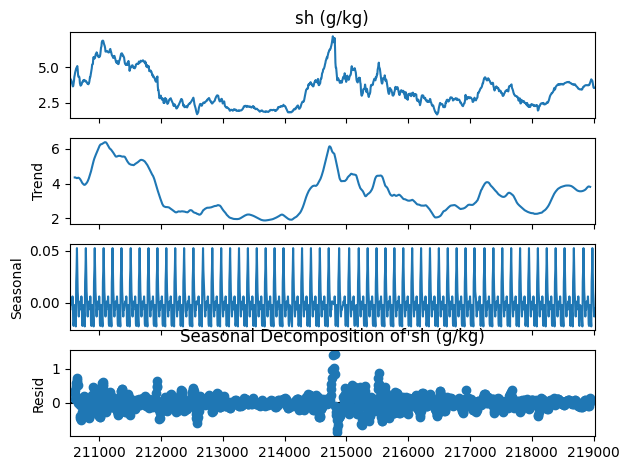

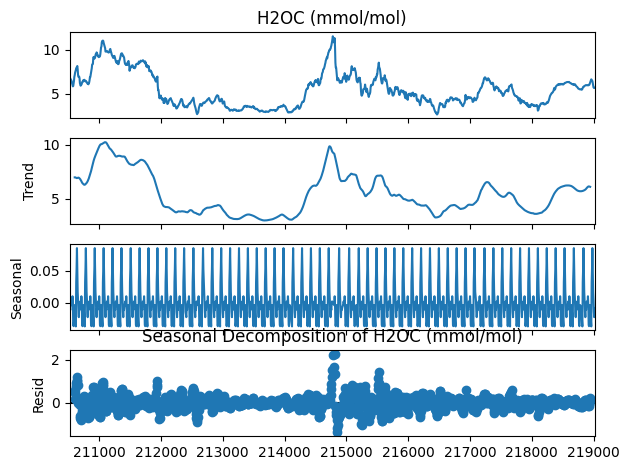

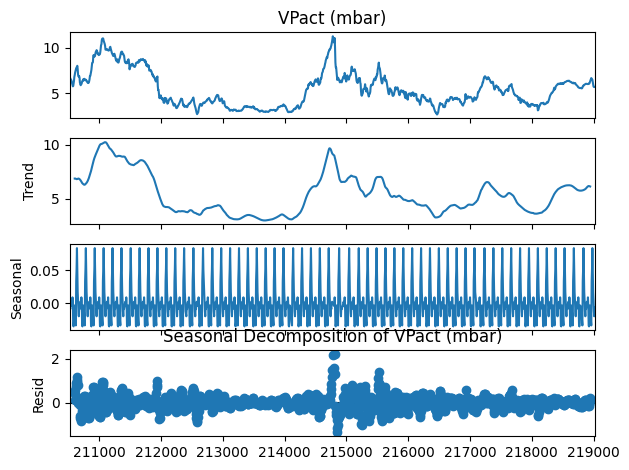

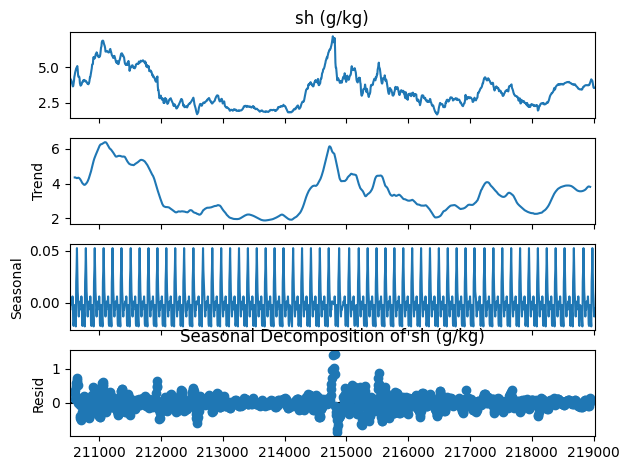

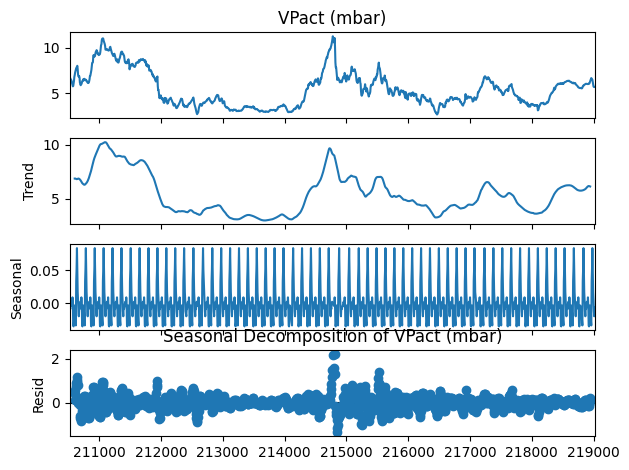

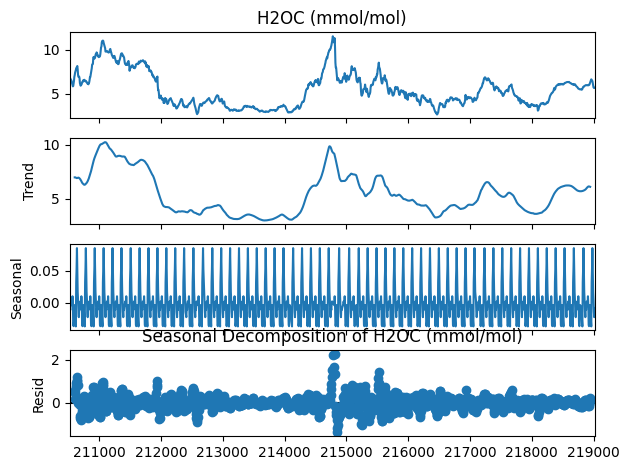

In [6]:
# 각 컬럼별 Trend, Seasonality, Noise 분해
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

for col in forecast_columns:
    result = seasonal_decompose(numeric_df[col], model='additive', period=24)  # 24시간 주기
    result.plot()
    plt.title(f"Seasonal Decomposition of {col}")
    plt.show()